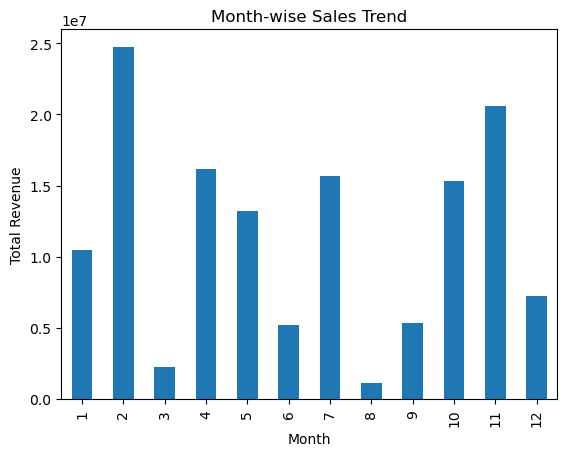

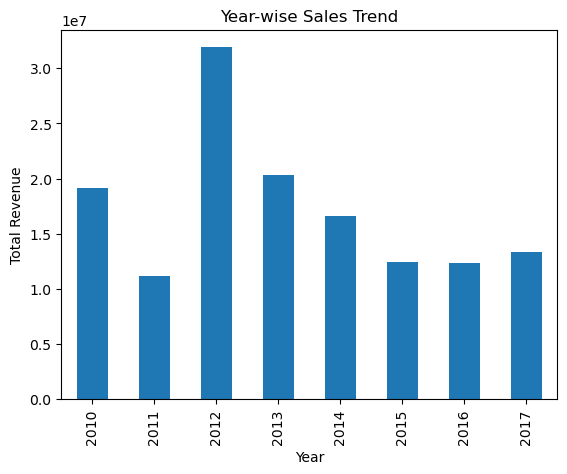

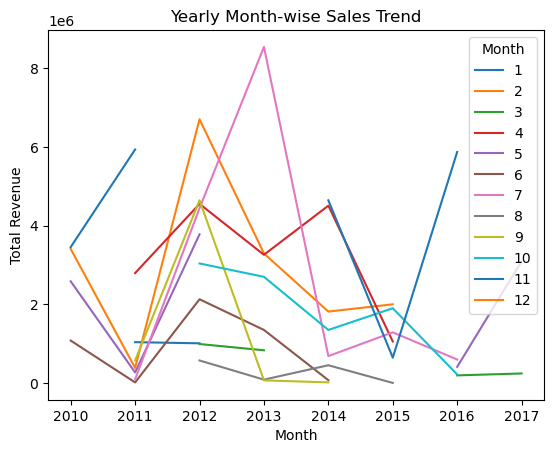

       Unit Price   Unit Cost  Total Revenue    Total Cost  Total Profit
count  100.000000  100.000000   1.000000e+02  1.000000e+02  1.000000e+02
mean   276.761300  191.048000   1.373488e+06  9.318057e+05  4.416820e+05
std    235.592241  188.208181   1.460029e+06  1.083938e+06  4.385379e+05
min      9.330000    6.920000   4.870260e+03  3.612240e+03  1.258020e+03
25%     81.730000   35.840000   2.687212e+05  1.688680e+05  1.214436e+05
50%    179.880000  107.275000   7.523144e+05  3.635664e+05  2.907680e+05
75%    437.200000  263.330000   2.212045e+06  1.613870e+06  6.358288e+05
max    668.270000  524.960000   5.997055e+06  4.509794e+06  1.719922e+06
              Unit Price  Unit Cost  Total Profit
Unit Price      1.000000   0.987270      0.557365
Unit Cost       0.987270   1.000000      0.467214
Total Profit    0.557365   0.467214      1.000000


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\prasa\OneDrive\Documents\KC\CODES 2024\INTERNSHIP_UM_KH\UM\Amazon Sales data.csv")

# Transform: Convert 'Order Date' column to datetime object
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract month and year from 'Order Date' column
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year

# Month-wise Sales Trend
monthly_sales = data.groupby('Month')['Total Revenue'].sum()
monthly_sales.plot(kind='bar', xlabel='Month', ylabel='Total Revenue', title='Month-wise Sales Trend')
plt.show()

# Year-wise Sales Trend
yearly_sales = data.groupby('Year')['Total Revenue'].sum()
yearly_sales.plot(kind='bar', xlabel='Year', ylabel='Total Revenue', title='Year-wise Sales Trend')
plt.show()

# Yearly Month-wise Sales Trend
yearly_monthly_sales = data.groupby(['Year', 'Month'])['Total Revenue'].sum().unstack()
yearly_monthly_sales.plot(kind='line', xlabel='Month', ylabel='Total Revenue', title='Yearly Month-wise Sales Trend')
plt.show()

# Key Metrics
key_metrics = data[['Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].describe()
print(key_metrics)

# Relationships Between Attributes
correlation_matrix = data[['Unit Price', 'Unit Cost', 'Total Profit']].corr()
print(correlation_matrix)


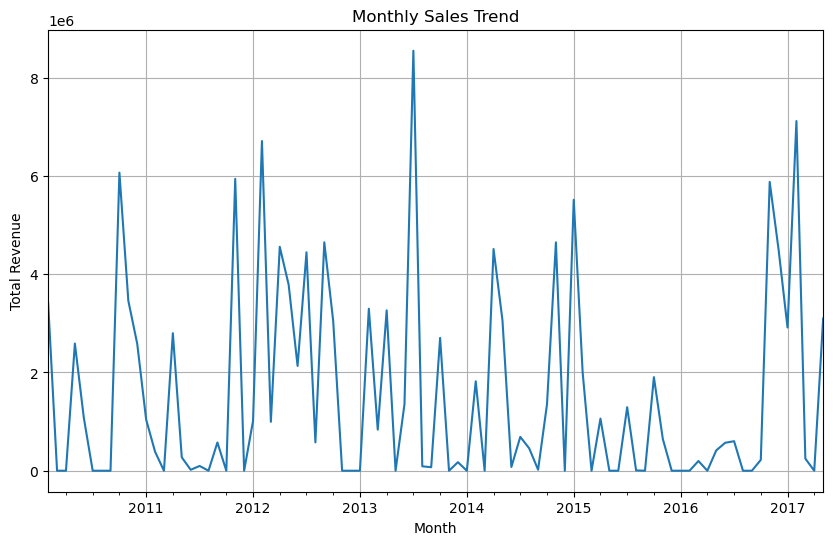

In [13]:
# Aggregate sales data by month
monthly_sales = data.groupby(pd.Grouper(key='Order Date', freq='M'))['Total Revenue'].sum()

# Plot monthly sales trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

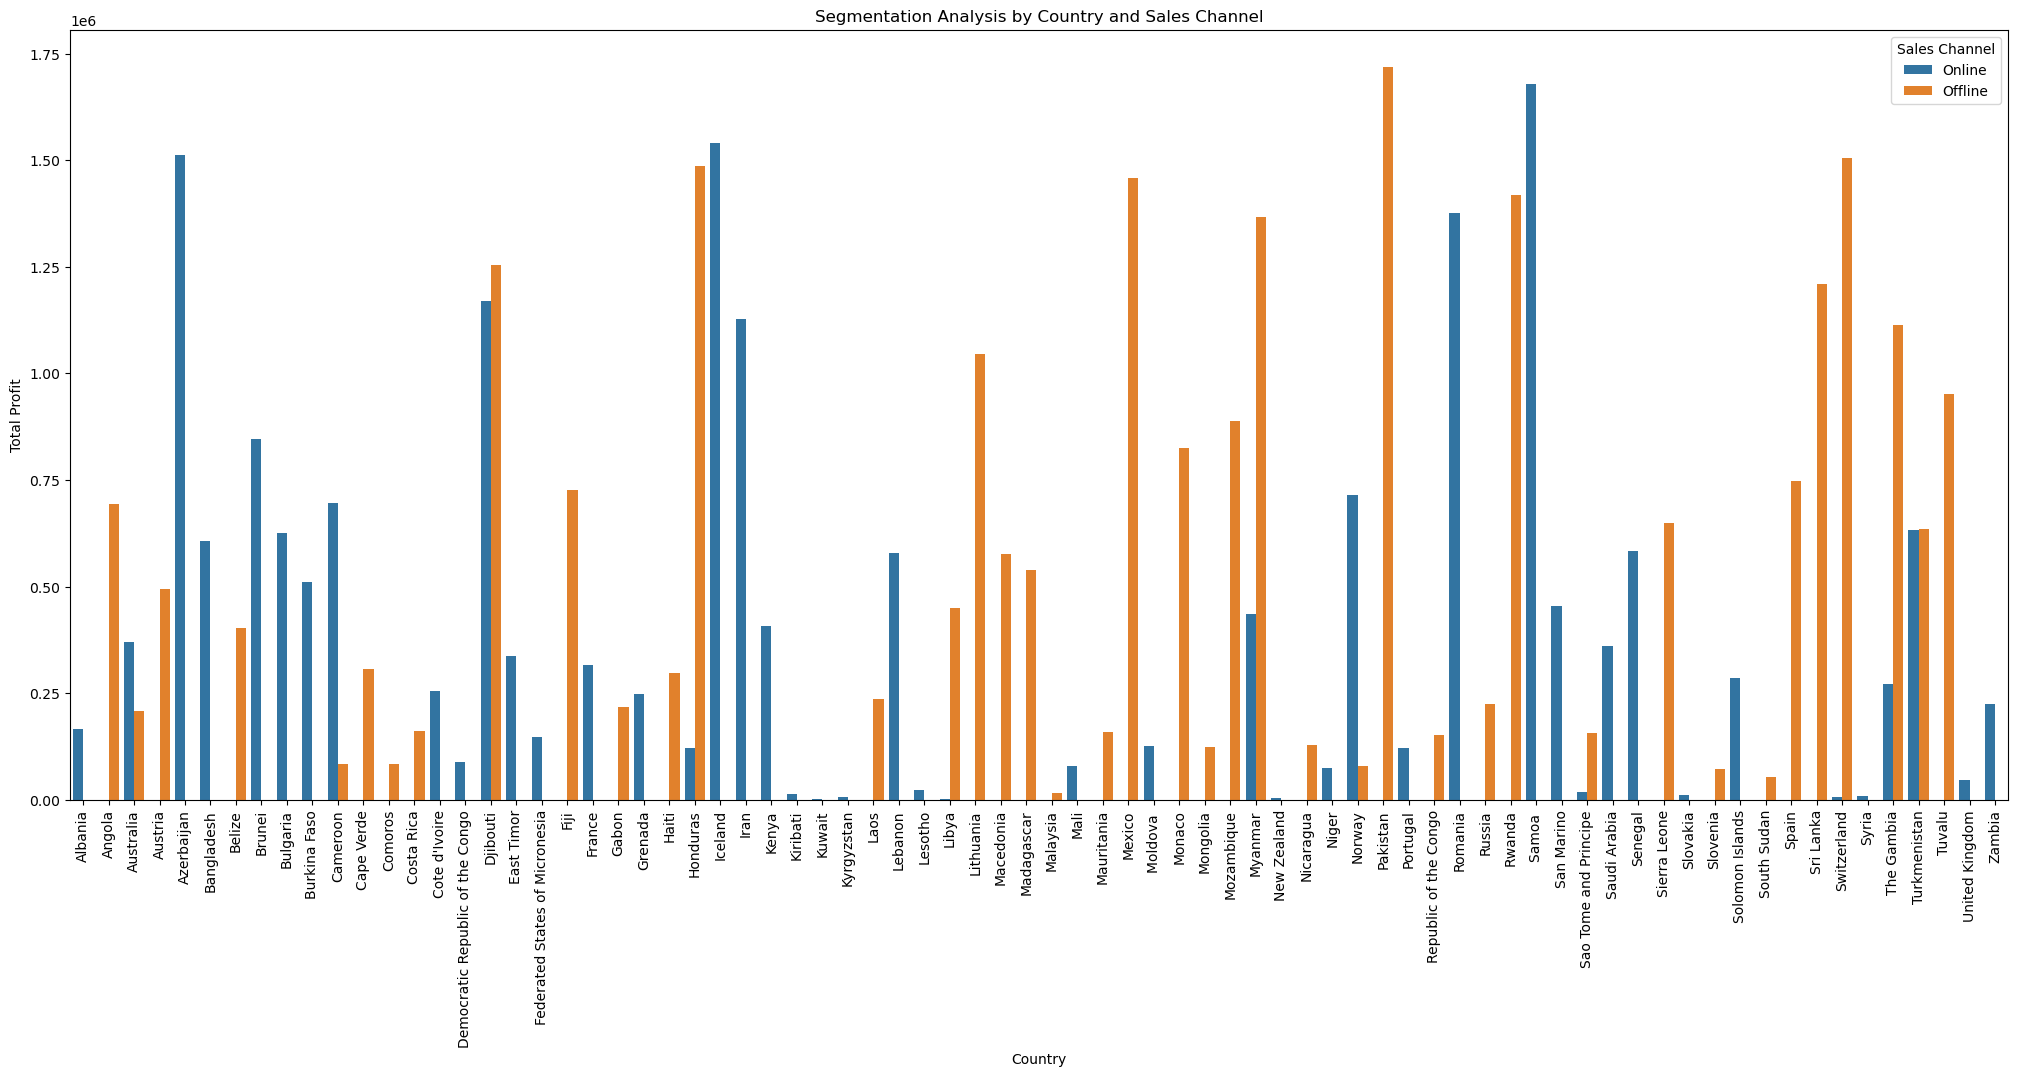

In [14]:
import seaborn as sns
# Perform segmentation analysis
segmentation_results = data.groupby(['Country', 'Sales Channel'])['Total Profit'].sum().reset_index()

# Visualize segmentation results
plt.figure(figsize=(25, 10))
sns.barplot(data=segmentation_results, x='Country', y='Total Profit', hue='Sales Channel')
plt.title('Segmentation Analysis by Country and Sales Channel')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.show()

In [15]:
import statsmodels.api as sm

# Perform multiple linear regression
X = data[['Unit Price', 'Unit Cost']]
y = data['Total Profit']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Total Profit   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     67.90
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           3.63e-19
Time:                        16:52:02   Log-Likelihood:                -1396.7
No. Observations:                 100   AIC:                             2799.
Df Residuals:                      97   BIC:                             2807.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.379e+04   5.14e+04     -1.047      0.2

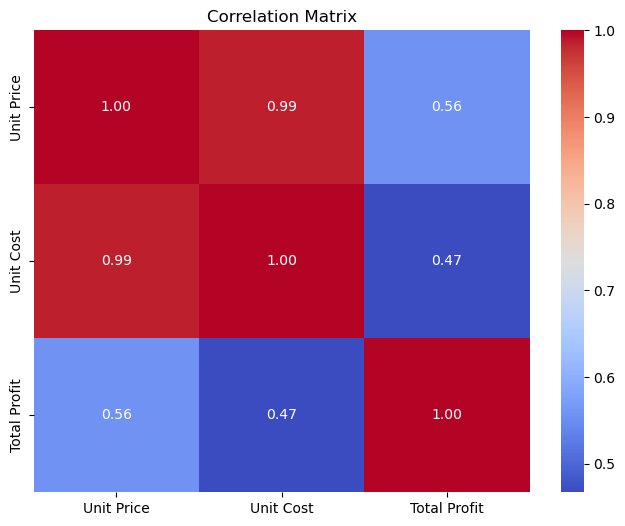

In [16]:
# Calculate correlation matrix
correlation_matrix = data[['Unit Price', 'Unit Cost', 'Total Profit']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [17]:
# Example: Use scikit-learn to build a predictive model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for modeling
X = data[['Unit Price', 'Unit Cost']]
y = data['Total Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 71834344390.61826


In [18]:
data.to_csv("Project_1.csv")